In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.python.ops.numpy_ops import np_config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np_config.enable_numpy_behavior()
%matplotlib inline

In [3]:
digits = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
digit_features = digits.copy()
digit_features.pop('label')
digit_features = tf.convert_to_tensor(digit_features).reshape((42000,28,28)) / 255


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [6]:
digit_labels = tf.convert_to_tensor(digits['label'])

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(28, (5, 5), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (5,5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 28)        728       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 56)          39256     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 56)          0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               89700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
import random

In [9]:
train_index = random.sample(range(42000), 29400)
train_images, train_labels = digit_features[train_index], digit_labels[train_index]
test_images, test_labels = [image for i, image in enumerate(digit_features) if i not in train_index], [label for i, label in enumerate(digit_labels) if i not in train_index]

In [10]:
test_images = tf.convert_to_tensor(np.array(test_images))
test_labels = tf.convert_to_tensor(np.array(test_labels))

In [11]:
train_images = np.expand_dims(train_images, axis = -1)
test_images = np.expand_dims(test_images, axis = -1)

In [12]:
test_images.shape

(12600, 28, 28, 1)

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), use_multiprocessing=True)

2022-05-22 20:36:36.361017: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
919/919 [==============================] - 14s 15ms/step - loss: 0.1640 - accuracy: 0.9508 - val_loss: 0.0688 - val_accuracy: 0.9796
Epoch 2/20
919/919 [==============================] - 13s 14ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0540 - val_accuracy: 0.9848
Epoch 3/20
919/919 [==============================] - 14s 15ms/step - loss: 0.0368 - accuracy: 0.9873 - val_loss: 0.0422 - val_accuracy: 0.9874
Epoch 4/20
919/919 [==============================] - 13s 14ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0415 - val_accuracy: 0.9879
Epoch 5/20
919/919 [==============================] - 13s 14ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0538 - val_accuracy: 0.9856
Epoch 6/20
919/919 [==============================] - 13s 15ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0425 - val_accuracy: 0.9879
Epoch 7/20
919/919 [==============================] - 13s 14ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0575 - val_accuracy:

394/394 - 2s - loss: 0.0752 - accuracy: 0.9887


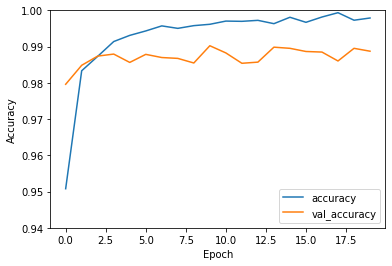

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.94, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [15]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [17]:
test_data = tf.convert_to_tensor(test_data).reshape((28000,28,28)) / 255
test_data = np.expand_dims(test_data, axis = -1)

In [18]:
logits = model.predict(test_data)
predicted_labels = [logit.argmax() for logit in logits]

In [19]:
predicted_labels[0:10]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]

In [20]:
submission = pd.DataFrame({'ImageId' : range(1,28001), 'Label' : predicted_labels})

In [21]:
submission.to_csv('/kaggle/working/submission.csv', index=False)